## Nearest Centroid Classifier (Clasificador Euclideano)

Es un algoritmo de aprendizaje supervisado. Este algoritmo consiste en **"condensar"** la información del conjunto de entrenamiento en **centroides (centros de nubes de puntos)** para hacer predicciones a nuevos patrones, **asignando cada nuevo patron al centroide más cercano**. 

**Un centroide es el centro geométrico de un conjunto de datos, éste algoritmo utiliza la media para calcular el centro geométrico. En múltiples dimensiones, este sería el valor medio a lo largo de cada dimensión, formando un punto de centro de la distribución a través de cada variable.**

El algoritmo asume que los centroides en el espacio de características (atributos) de entrada son diferentes para cada etiqueta de destino, es decir, que **no existen dos o más centroides iguales para una etiqueta**.

**Los centroides "representan" el modelo. Dados nuevos patrones se calcula la distancia entre cada patron y cada centroide y se usa el centroide más cercano para hacer la predicción.**

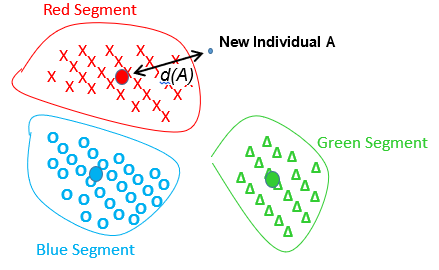

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Procesamiento

In [3]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### Train, Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (105, 4), y_train: (105,)
X_test: (45, 4),  y_test: (45,)


### Modelo

In [5]:
from sklearn.neighbors import NearestCentroid

In [6]:
# NearestCentroid

model = NearestCentroid(metric = "euclidean")

model.fit(X_train, y_train)

NearestCentroid()

### Predicciones

In [7]:
yhat = model.predict(X_test)

yhat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0,
       0])

### Métricas

In [8]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.9042735042735043
Accuracy: 0.9555555555555556
Precisión: 0.9555555555555556
Sensibilidad: 0.9487179487179488
F1-score: 0.9484126984126983


In [10]:
data = pd.DataFrame(X)
data['y'] = y
data

,0,1,2,3,y
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


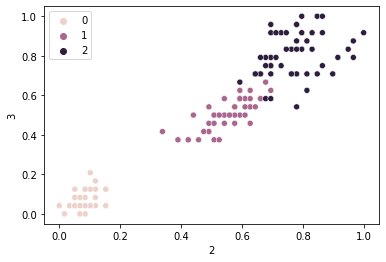

In [20]:
sns.scatterplot(data=data, x=2, y=3, hue=y);

### Confusion Matrix

In [13]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[19,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 13]], dtype=int64)

### Classification Report

In [14]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     0.846     0.917        13
           2      0.867     1.000     0.929        13

    accuracy                          0.956        45
   macro avg      0.956     0.949     0.948        45
weighted avg      0.961     0.956     0.955        45



### Atributos del Modelo

In [15]:
# .centroids_ retorna un array con los centroides del modelo, uno por cada clase. 

model.centroids_

array([[0.18458781, 0.57392473, 0.07873155, 0.06182796],
       [0.43393393, 0.3018018 , 0.54420522, 0.50112613],
       [0.62762763, 0.41103604, 0.77049931, 0.79391892]])

In [ ]:
# .classes_ retorna las etiquetas de la variable objetivo

model.classes_

In [16]:
# .n_features_in_ retorna el número de atributos (columnas) de los centroides

model.n_features_in_

4

### Centroides y nubes de puntos

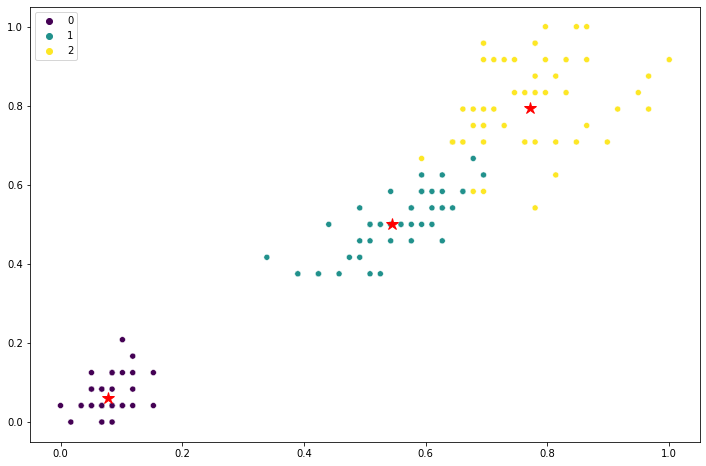

In [21]:
a, b = 2, 3

plt.figure(figsize = (12, 8))

sns.scatterplot(x = X[:, a], y = X[:, b], hue = y, palette = "viridis")

plt.plot(model.centroids_[0][a], model.centroids_[0][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[1][a], model.centroids_[1][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[2][a], model.centroids_[2][b], marker = "*", markersize = 12, color = "red")

plt.show()

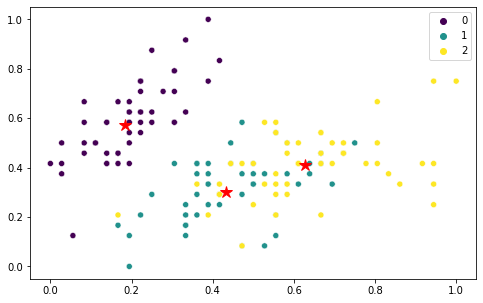

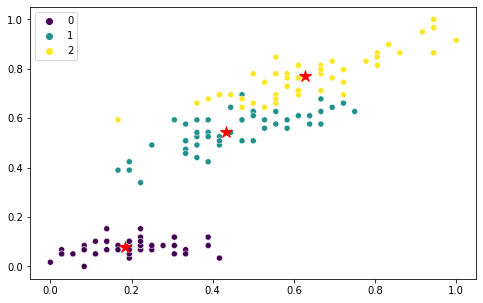

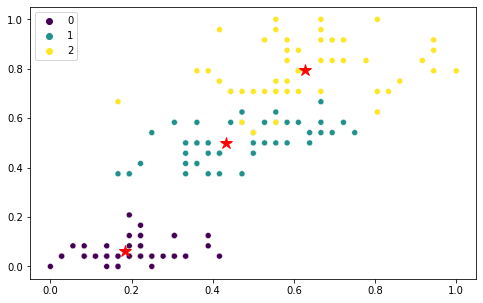

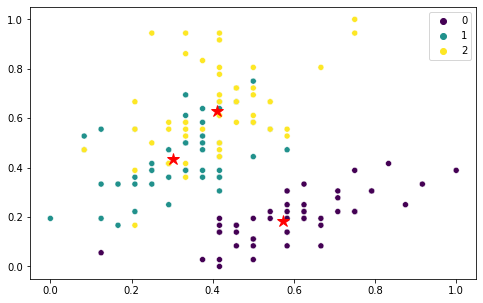

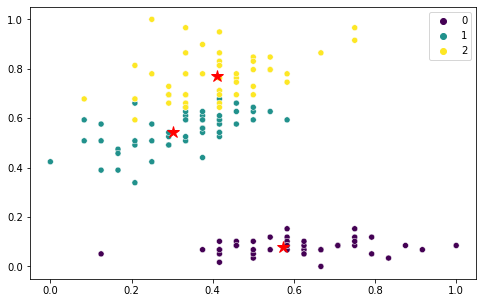

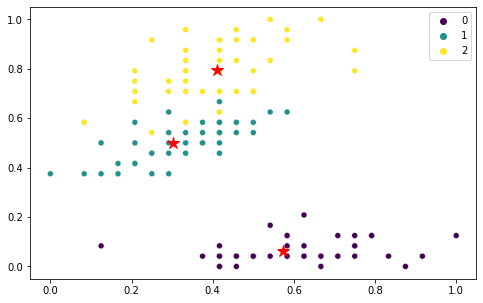

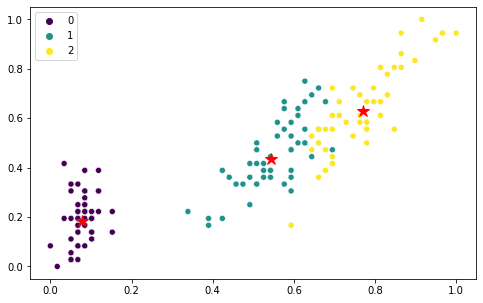

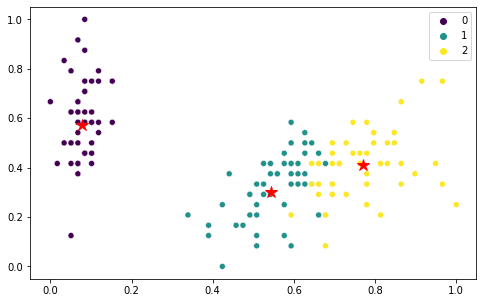

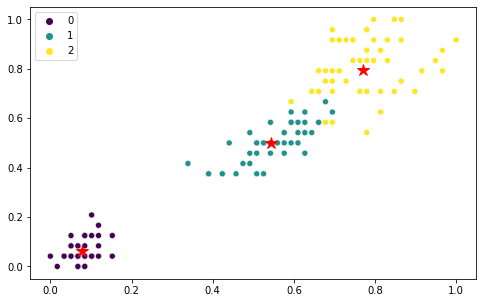

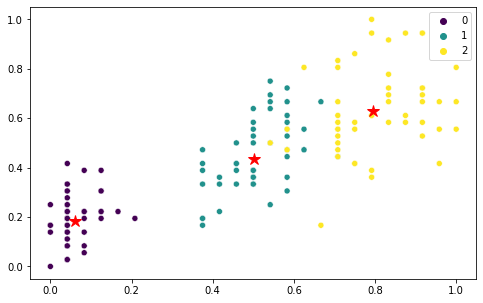

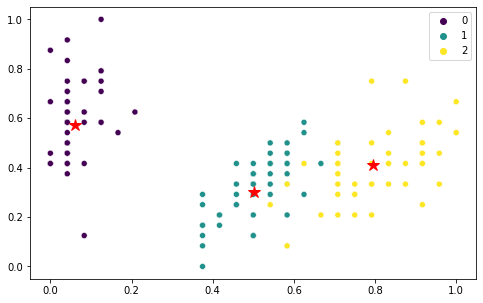

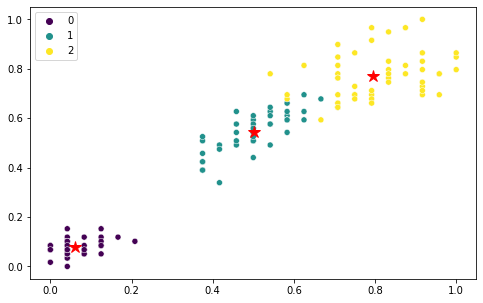

In [22]:
for i in range(4):
    for j in range(4):
        if i != j:

            plt.figure(figsize = (8, 5))

            sns.scatterplot(x = X[:, i], y = X[:, j], hue = y, palette = "viridis")

            plt.plot(model.centroids_[0][i], model.centroids_[0][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[1][i], model.centroids_[1][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[2][i], model.centroids_[2][j], marker = "*", markersize = 12, color = "red")
            
            plt.show()

In [ ]:
################################################################################################################################

### Ejercicio 1: 
- Utiliza el dataset del titanic para practicar **`NearestCentroid`**:

### Ejercicio 2:
- Intenta recrear el algormito de **`NearestCentroid`**:
1. Sea **`x`** un patron de prueba a clasificar.
2. Se calculan los **`n-centroides`** (uno para cada clase).
3. Se calcula la distancia entre los **`n-centroides`** y el patron.
5. Asigna la clase del centroide más cercano al nuevo patron.
6. Repite el algoritmo con otra formula de distancia.